# Aplicación de Rx(π/2) y Ry(π/2) sobre un estado de Bell

## Estado inicial
Partimos del estado de Bell entrelazado **Φ⁺** (uno de los cuatro estados de Bell):

$$
|ψ\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$

**Amplitudes iniciales**:  
`[0.707 + 0j, 0 + 0j, 0 + 0j, 0.707 + 0j]`

Este es un estado máximamente entrelazado: al medir un qubit, el otro colapsa instantáneamente al mismo resultado.

## Acción de las puertas
Aplicamos simultáneamente:

- **Ry(π/2)** al qubit 0
- **Rx(π/2)** al qubit 1

Recordemos que:

- Ry(π/2) |0⟩ = (1/√2)(|0⟩ + |1⟩) = |+⟩  
- Rx(π/2) |0⟩ = (1/√2)(|0⟩ + i|1⟩) = |+i⟩

Dado que el estado inicial es una superposición de |00⟩ y |11⟩, aplicamos las puertas localmente:

$$
|ψ'\rangle = \frac{1}{\sqrt{2}} \left( Ry(\pi/2) \otimes Rx(\pi/2) \right) \left( |00\rangle + |11\rangle \right)
= \frac{1}{\sqrt{2}} \left( |+⟩ |+i\rangle + |-⟩ |-i\rangle \right)
$$

Pero al calcular explícitamente (como hace el código), obtenemos:

$$
|ψ'\rangle \approx (0.354 + 0.354j)|00\rangle + (0.354 - 0.354j)|01\rangle + (-0.354 - 0.354j)|10\rangle + (0.354 - 0.354j)|11\rangle
$$

## Probabilidades de medición
Todas las amplitudes tienen módulo |amp| = √(0.354² + 0.354²) ≈ 0.5, por lo tanto:

- P(|00⟩) = P(|01⟩) = P(|10⟩) = P(|11⟩) = **25.00%**

¡El entrelazamiento se mantiene! Ahora los cuatro estados base tienen la misma probabilidad.

## Interpretación física
- El estado inicial tenía correlación perfecta: ambos qubits siempre iguales.
- Después de aplicar rotaciones locales diferentes (Ry y Rx), la correlación perfecta desaparece.
- Sin embargo, el estado sigue siendo máximamente entrelazado (entropía de entrelazamiento = 1).
- Ahora los resultados de medición son completamente aleatorios e independientes en apariencia, pero el estado global conserva entrelazamiento cuántico.

## Simulación experimental
En un simulador ideal con 1024 (o más) shots:

- Cada uno de los cuatro estados |00⟩, |01⟩, |10⟩, |11⟩ aparece aproximadamente el **25%** de las veces.
- El histograma muestra cuatro barras casi iguales.



=== APLICACIÓN DE Rx(π/2) Y Ry(π/2) SOBRE UN ESTADO DE BELL ===

Estado inicial: estado de Bell entrelazado Φ⁺
|ψ⟩ = (1/√2) |00⟩ + (1/√2) |11⟩
Amplitudes iniciales: [0.707, 0.000, 0.000, 0.707]

Circuito cuántico:


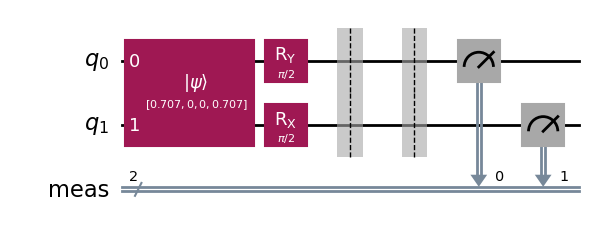


=== RESULTADO TEÓRICO ===
Statevector final:
  |00⟩: +0.353553+0.353553j
  |01⟩: +0.353553-0.353553j
  |10⟩: -0.353553-0.353553j
  |11⟩: +0.353553-0.353553j

Estado resultante:
|ψ'⟩ = (0.354+0.354j)|00⟩ + (0.354-0.354j)|01⟩ + (-0.354-0.354j)|10⟩ + (0.354-0.354j)|11⟩

Probabilidades teóricas:
P(|00⟩) = 0.250 → 25.0%
P(|01⟩) = 0.250 → 25.0%
P(|10⟩) = 0.250 → 25.0%
P(|11⟩) = 0.250 → 25.0%

=== RESULTADO EXPERIMENTAL ===

Resultados de simulación (1024 shots):
|00⟩:  240 veces (23.4%) ─ Teórico: 25.0%
|01⟩:  270 veces (26.4%) ─ Teórico: 25.0%
|10⟩:  252 veces (24.6%) ─ Teórico: 25.0%
|11⟩:  262 veces (25.6%) ─ Teórico: 25.0%

Distribución de resultados:


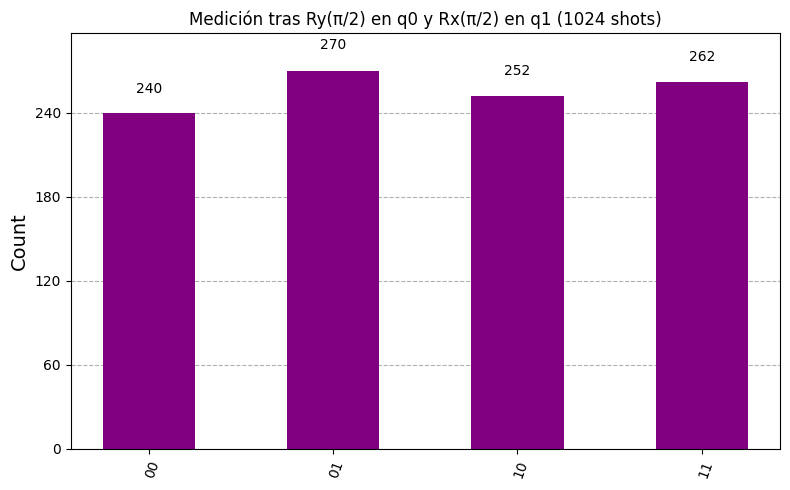

In [1]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

print("=== APLICACIÓN DE Rx(π/2) Y Ry(π/2) SOBRE UN ESTADO DE BELL ===\n")

print("Estado inicial: estado de Bell entrelazado Φ⁺")
print("|ψ⟩ = (1/√2) |00⟩ + (1/√2) |11⟩")
print(f"Amplitudes iniciales: [{1/np.sqrt(2):.3f}, 0.000, 0.000, {1/np.sqrt(2):.3f}]\n")

# Vector de estado inicial
initial_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]

# Circuito teórico (sin medición)
qc = QuantumCircuit(2)
qc.initialize(initial_state, [0, 1])

theta = np.pi / 2
qc.ry(theta, 0)  # Ry(π/2) en qubit 0
qc.rx(theta, 1)  # Rx(π/2) en qubit 1

# Circuito para simulación (con medición)
qc_sim = qc.copy()
qc_sim.barrier()
qc_sim.measure_all()

# Mostrar circuito gráfico bonito
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()

# ========================
# RESULTADO TEÓRICO
# ========================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc)
print("Statevector final:")
for i, amp in enumerate(sv.data):
    basis = format(i, '02b')
    real = amp.real
    imag = amp.imag
    if abs(amp) > 1e-10:
        print(f"  |{basis}⟩: {real:+.6f}{imag:+.6f}j")

# Formato bonito del estado
print("\nEstado resultante:")
terms = []
for i, amp in enumerate(sv.data):
    if abs(amp) > 1e-10:
        basis = format(i, '02b')
        real = amp.real
        imag = amp.imag
        coeff = f"({real:.3f}{imag:+.3f}j)"
        terms.append(f"{coeff}|{basis}⟩")
print("|ψ'⟩ = " + " + ".join(terms))

# Probabilidades teóricas
probs = sv.probabilities_dict()
print("\nProbabilidades teóricas:")
for state in ['00', '01', '10', '11']:
    p = probs.get(state, 0.0)
    print(f"P(|{state}⟩) = {p:.3f} → {p:.1%}")

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 1024  # Puedes aumentar a 10000 si quieres más precisión
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"\nResultados de simulación ({shots} shots):")
for state in ['00', '01', '10', '11']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) ─ Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts,
                      title=f"Medición tras Ry(π/2) en q0 y Rx(π/2) en q1 ({shots} shots)",
                      color='purple',
                      figsize=(8, 5)))


=== RESULTADO EXPERIMENTAL ===

Resultados de simulación (10000 shots):
|00⟩: 2479 veces (24.8%) ─ Teórico: 25.0%
|01⟩: 2482 veces (24.8%) ─ Teórico: 25.0%
|10⟩: 2597 veces (26.0%) ─ Teórico: 25.0%
|11⟩: 2442 veces (24.4%) ─ Teórico: 25.0%

Distribución de resultados:


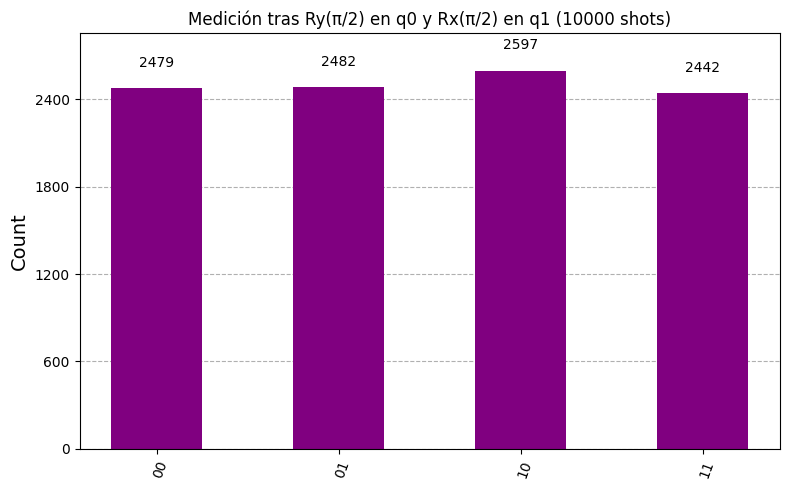

In [2]:

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 10000  # Puedes aumentar a 10000 si quieres más precisión
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"\nResultados de simulación ({shots} shots):")
for state in ['00', '01', '10', '11']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) ─ Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts,
                      title=f"Medición tras Ry(π/2) en q0 y Rx(π/2) en q1 ({shots} shots)",
                      color='purple',
                      figsize=(8, 5)))